Finding sharp ratio return and volatility and plotting them on the graph.
There is no constraint on weight distribution for now. 
I used scipy. optimizer for finding sharp ratio and frontier.
For random weight allocation to portfolio I have used the cvxpot based function. 

Somehow after experimenting a lot I got something thet made more sense while plotting. 
Now in 2nd step i will work on weights constraints based on classd etc if it works.


In [34]:
import numpy as np
import pandas as pd
from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot 
from cvxopt import blas, solvers 
import matplotlib.pyplot as plt
%matplotlib inline
import cvxopt as opt
import matplotlib.patches as mpatches

In [2]:
stocks=pd.read_csv('VCV and Returns Matrix.csv')
#cleaning the data 
stocks=stocks.drop([0],0)
stocks.index=stocks['Unnamed: 0']
stocks=stocks.drop(['Unnamed: 0'],1)

In [3]:
# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')



Stocks
Index(['Apple Computer Inc', 'iShares Core MSCI Emerging Markets ETF',
       'Vanguard Financials ETF', 'iShares Dow Jones US ETF',
       'First Trust Financials AlphaDEX Fund', 'BDO Unibank',
       'SM Prime Holding ', 'Security Bank Corporation', 'Ayala Land INC',
       'Microsoft Corp', 'American Express Co', 'Wells Fargo & Co',
       'iShares MSCI USA Islamic', 'Hewlett Packard Enterprise',
       'Bank of America Corporation', 'Whirlpool Corp', 'Xerox Corp',
       'Juno Therapeutics Inc', 'Xenon Pharmaceuticals Inc', '364-day Tbill',
       '182-day Tbill ', '26W US Treassury Bills ', '52W US Treassury Bills',
       'Vanguard Extended Duration Treasury ETF', '15Y Retail Treasury Bond',
       '6Y Retail Treasury Bond  ', '2Y Treasury Note', '14Y Treasury Note ',
       '8Y Treasury Note ', '1.5Y Treasury Note', '10Y Treasury Bond',
       'Altisource Residential Corp', 'Brookfield Property Partners',
       'BPI Philippine Equity Index Fund', 'Metro PSEi Tracker Fund

In [4]:
n=len(stocks.columns)

In [5]:
# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(n))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

Creating Random Weights
[ 0.32965945  0.34967479  0.88563361  0.50829178  0.8466769   0.29076232
  0.94857722  0.68107006  0.93756624  0.4453946   0.79856298  0.03050506
  0.8383173   0.14813155  0.53793274  0.85689897  0.74654549  0.48800277
  0.97154559  0.49354539  0.65277322  0.95087033  0.94401341  0.03557715
  0.64127106  0.44198509  0.1879259   0.16545968  0.74029873  0.30280869
  0.19870852  0.23715152  0.0182479   0.7950363   0.49020848  0.34704585
  0.56763418  0.53429073  0.60954581  0.33806523  0.57116326  0.15243946
  0.00347966  0.14311022  0.67394687  0.28181334  0.86986548  0.27945515
  0.42599895  0.44773702]


Rebalance to sum to 1.0
[ 0.01309148  0.01388633  0.0351704   0.02018535  0.03362334  0.01154679
  0.03767002  0.02704674  0.03723275  0.01768757  0.03171264  0.00121142
  0.03329137  0.00588262  0.02136246  0.03402928  0.02964691  0.01937963
  0.03858215  0.01959974  0.02592302  0.03776109  0.03748878  0.00141284
  0.02546624  0.01755217  0.00746294  0.00657076

In [6]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(stocks.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(stocks.cov(), weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [7]:
from scipy.optimize import minimize
#works as a minimization function,we actually need to maximize the Sharpe Ratio,
#we will need to turn it negative so we can minimize the negative sharpe

In [8]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [9]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [10]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [11]:
# 0-1 bounds for each weight
bounds = [((0, 1))]*n

In [12]:
#Getting a random initial weight
initial=np.random.rand(n)
initial = initial / np.sum(initial)

In [13]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,initial,method='SLSQP',bounds=bounds,constraints=cons)

In [14]:
opt_results

     fun: -0.1787019395753251
     jac: array([  2.10717998e-01,   8.06666687e-02,   8.08986854e-02,
         8.06666687e-02,   8.03837143e-02,   8.01481139e-02,
         2.44721252e-01,   8.00097752e-02,   2.90321745e-03,
        -8.01589340e-05,   3.85689717e-02,   1.05961468e-01,
         6.23110682e-05,   2.76641399e-02,   2.91335030e-01,
         1.61283698e-01,   1.61515713e-01,   1.61283698e-01,
         1.61000744e-01,   1.60765143e-01,   3.25338284e-01,
         1.60626804e-01,   8.35202467e-02,   8.05368703e-02,
         1.19186003e-01,   1.86578499e-01,   8.06793403e-02,
         1.08281167e-01,   3.71952059e-01,   2.41900729e-01,
         2.42132742e-01,   2.41900729e-01,   2.41617775e-01,
         2.41382174e-01,   4.05955313e-01,   2.41243834e-01,
         1.64137278e-01,   1.61153901e-01,   1.99803032e-01,
         2.67195528e-01,   1.61296371e-01,   1.88898196e-01,
         1.30100971e-01,   4.96394932e-05,   2.81658024e-04,
         4.96394932e-05,  -2.33314931e-04,  -

In [16]:
# gets the optimum allocation
print ('The Optimum weights',opt_results.x)
#opt_results.x.sum() # Checking sum is 1 or not


The Optimum weights [  3.24076897e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.61046768e-16   0.00000000e+00
   6.21207814e-16   4.72147211e-02   1.57518571e-16   0.00000000e+00
   4.09717890e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.74693940e-17
   0.00000000e+00   0.00000000e+00   1.30987335e-16   0.00000000e+00
   1.77616287e-17   4.69550482e-17   1.95584122e-16   9.25319726e-17
   1.54068922e-16   0.00000000e+00   1.89915755e-16   0.00000000e+00
   0.00000000e+00   2.45488617e-16   0.00000000e+00   0.00000000e+00
   1.36024069e-16   6.15042753e-17   1.62624329e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.44790146e-17   1.59872771e-01
   3.28256352e-01   1.28140522e-01   1.78429959e-01   5.22641252e-02
   5.89892045e-17   6.48497610e-02]


In [17]:
get_ret_vol_sr(opt_results.x)

array([ 0.00221668,  0.01240433,  0.17870194])

In [18]:
print('optimum sharp ratio', get_ret_vol_sr(opt_results.x)[2])

optimum sharp ratio 0.178701939575


In [19]:
print('optimum return at max sharp ratio', get_ret_vol_sr(opt_results.x)[0])

optimum return at max sharp ratio 0.00221667726987


In [20]:
print('optimum volatility at max sharp ratio', get_ret_vol_sr(opt_results.x)[1])

optimum volatility at max sharp ratio 0.0124043268648


In [21]:
get_ret_vol_sr(opt_results.x)[0].max()

0.0022166772698748059

In [22]:
# returns go from 0 to somewhere along 0.0023
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0.000,0.0023,10) 

In [23]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [24]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,initial,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

In [26]:
def optimal_portfolio(returns):
    
    returns=np.transpose(returns)
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 1000
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks


In [27]:
q=np.asmatrix(stocks)

In [28]:
weights, returns, risks = optimal_portfolio(q)

     pcost       dcost       gap    pres   dres
 0:  1.8635e-05 -1.0030e+00  1e+00  1e-16  7e+00
 1:  1.5166e-05 -1.2984e-02  1e-02  6e-17  9e-02
 2: -2.0288e-04 -3.0830e-03  3e-03  2e-16  2e-02
 3: -1.2633e-03 -4.0684e-03  3e-03  1e-16  2e-02
 4: -2.8313e-03 -2.9954e-03  2e-04  3e-16  1e-17
 5: -2.9664e-03 -2.9682e-03  2e-06  2e-16  1e-17
 6: -2.9678e-03 -2.9679e-03  2e-08  7e-18  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8703e-05 -1.0030e+00  1e+00  7e-18  7e+00
 1:  1.5234e-05 -1.2984e-02  1e-02  1e-16  9e-02
 2: -2.0281e-04 -3.0829e-03  3e-03  3e-17  2e-02
 3: -1.2634e-03 -4.0685e-03  3e-03  1e-16  2e-02
 4: -2.8309e-03 -2.9949e-03  2e-04  3e-16  1e-17
 5: -2.9662e-03 -2.9680e-03  2e-06  3e-16  1e-17
 6: -2.9676e-03 -2.9676e-03  2e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8772e-05 -1.0030e+00  1e+00  4e-16  7e+00
 1:  1.5303e-05 -1.2983e-02  1e-02  3e-16  9e-02
 2: -2.0274e-04 -3.0828e

 2: -1.9959e-04 -3.0787e-03  3e-03  5e-16  2e-02
 3: -1.2678e-03 -4.0733e-03  3e-03  4e-16  2e-02
 4: -2.8132e-03 -2.9741e-03  2e-04  2e-16  1e-17
 5: -2.9535e-03 -2.9553e-03  2e-06  2e-16  1e-17
 6: -2.9550e-03 -2.9550e-03  2e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2067e-05 -1.0030e+00  1e+00  2e-16  7e+00
 1:  1.8598e-05 -1.2980e-02  1e-02  3e-16  9e-02
 2: -1.9949e-04 -3.0786e-03  3e-03  1e-16  2e-02
 3: -1.2680e-03 -4.0734e-03  3e-03  7e-16  2e-02
 4: -2.8126e-03 -2.9735e-03  2e-04  5e-16  1e-17
 5: -2.9531e-03 -2.9549e-03  2e-06  2e-16  1e-17
 6: -2.9546e-03 -2.9546e-03  2e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2175e-05 -1.0030e+00  1e+00  3e-16  7e+00
 1:  1.8705e-05 -1.2979e-02  1e-02  7e-17  9e-02
 2: -1.9938e-04 -3.0785e-03  3e-03  2e-16  2e-02
 3: -1.2681e-03 -4.0736e-03  3e-03  2e-16  2e-02
 4: -2.8120e-03 -2.9728e-03  2e-04  2e-16  1e-17
 5: -2.9527e-03 -2.9544

 4: -2.7974e-03 -2.9556e-03  2e-04  3e-16  1e-17
 5: -2.9422e-03 -2.9439e-03  2e-06  2e-16  1e-17
 6: -2.9437e-03 -2.9437e-03  2e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5027e-05 -1.0030e+00  1e+00  4e-17  7e+00
 1:  2.1556e-05 -1.2976e-02  1e-02  4e-16  9e-02
 2: -1.9656e-04 -3.0748e-03  3e-03  5e-16  2e-02
 3: -1.2722e-03 -4.0780e-03  3e-03  4e-16  2e-02
 4: -2.7967e-03 -2.9547e-03  2e-04  2e-16  1e-17
 5: -2.9416e-03 -2.9433e-03  2e-06  3e-16  8e-18
 6: -2.9432e-03 -2.9432e-03  2e-08  5e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5169e-05 -1.0030e+00  1e+00  1e-16  7e+00
 1:  2.1698e-05 -1.2976e-02  1e-02  1e-16  9e-02
 2: -1.9642e-04 -3.0746e-03  3e-03  5e-17  2e-02
 3: -1.2724e-03 -4.0782e-03  3e-03  1e-16  2e-02
 4: -2.7957e-03 -2.9540e-03  2e-04  2e-16  3e-06
 5: -2.9411e-03 -2.9428e-03  2e-06  6e-16  3e-08
 6: -2.9426e-03 -2.9426e-03  2e-08  2e-16  3e-10
Optimal solution found.

 4: -2.7573e-03 -2.9369e-03  2e-04  3e-16  2e-04
 5: -2.9234e-03 -2.9253e-03  2e-06  2e-16  2e-06
 6: -2.9251e-03 -2.9252e-03  2e-08  3e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9885e-05 -1.0030e+00  1e+00  1e-16  7e+00
 1:  2.6413e-05 -1.2970e-02  1e-02  3e-17  9e-02
 2: -1.9176e-04 -3.0686e-03  3e-03  6e-17  2e-02
 3: -1.2794e-03 -4.0859e-03  3e-03  2e-16  2e-02
 4: -2.7557e-03 -2.9361e-03  2e-04  3e-16  2e-04
 5: -2.9226e-03 -2.9246e-03  2e-06  1e-16  2e-06
 6: -2.9244e-03 -2.9244e-03  2e-08  2e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0083e-05 -1.0030e+00  1e+00  2e-16  7e+00
 1:  2.6611e-05 -1.2970e-02  1e-02  2e-16  9e-02
 2: -1.9156e-04 -3.0683e-03  3e-03  2e-16  2e-02
 3: -1.2797e-03 -4.0863e-03  3e-03  6e-16  2e-02
 4: -2.7541e-03 -2.9354e-03  2e-04  4e-16  2e-04
 5: -2.9219e-03 -2.9238e-03  2e-06  2e-16  2e-06
 6: -2.9236e-03 -2.9236e-03  2e-08  1e-16  2e-08
Optimal solution found.

     pcost       dcost       gap    pres   dres
 0:  3.6945e-05 -1.0030e+00  1e+00  2e-16  7e+00
 1:  3.3470e-05 -1.2962e-02  1e-02  4e-16  9e-02
 2: -1.8479e-04 -3.0596e-03  3e-03  2e-16  2e-02
 3: -1.2905e-03 -4.0984e-03  3e-03  3e-16  2e-02
 4: -2.7003e-03 -2.9094e-03  2e-04  5e-16  4e-04
 5: -2.8951e-03 -2.8973e-03  2e-06  3e-16  4e-06
 6: -2.8971e-03 -2.8971e-03  2e-08  1e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7225e-05 -1.0030e+00  1e+00  9e-17  7e+00
 1:  3.3750e-05 -1.2962e-02  1e-02  1e-16  9e-02
 2: -1.8451e-04 -3.0592e-03  3e-03  2e-16  2e-02
 3: -1.2910e-03 -4.0989e-03  3e-03  2e-16  2e-02
 4: -2.6982e-03 -2.9084e-03  2e-04  1e-16  4e-04
 5: -2.8940e-03 -2.8962e-03  2e-06  5e-16  4e-06
 6: -2.8960e-03 -2.8960e-03  2e-08  3e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7508e-05 -1.0030e+00  1e+00  1e-16  7e+00
 1:  3.4033e-05 -1.2962e-02  1e-02  2e-16  9e-02
 2: -1.8423e-04 -3.0588e

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5755e-05 -1.0030e+00  1e+00  2e-16  7e+00
 1:  4.2277e-05 -1.2952e-02  1e-02  4e-16  9e-02
 2: -1.7609e-04 -3.0483e-03  3e-03  9e-17  2e-02
 3: -1.3056e-03 -4.1156e-03  3e-03  3e-16  2e-02
 4: -2.6379e-03 -2.8762e-03  2e-04  1e-16  6e-04
 5: -2.8607e-03 -2.8633e-03  3e-06  3e-16  6e-06
 6: -2.8631e-03 -2.8631e-03  3e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.6137e-05 -1.0030e+00  1e+00  8e-17  7e+00
 1:  4.2659e-05 -1.2951e-02  1e-02  8e-17  9e-02
 2: -1.7571e-04 -3.0478e-03  3e-03  2e-16  2e-02
 3: -1.3063e-03 -4.1164e-03  3e-03  5e-16  2e-02
 4: -2.6353e-03 -2.8747e-03  2e-04  5e-16  7e-04
 5: -2.8593e-03 -2.8618e-03  3e-06  2e-16  6e-06
 6: -2.8616e-03 -2.8616e-03  3e-08  2e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.6523e-05 -1.0030e+00  1e+00  1e-16  7e+00
 1:  4.3045e-05 -1.2951e-02  1e-02  5e-17  9e-02


 1:  5.3776e-05 -1.2938e-02  1e-02  1e-16  9e-02
 2: -1.6474e-04 -3.0336e-03  3e-03  6e-17  2e-02
 3: -1.3275e-03 -4.1413e-03  3e-03  1e-16  2e-02
 4: -2.5660e-03 -2.8329e-03  3e-04  5e-16  9e-04
 5: -2.8160e-03 -2.8189e-03  3e-06  3e-16  8e-06
 6: -2.8186e-03 -2.8186e-03  3e-08  2e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7773e-05 -1.0029e+00  1e+00  3e-17  7e+00
 1:  5.4291e-05 -1.2938e-02  1e-02  4e-17  9e-02
 2: -1.6423e-04 -3.0329e-03  3e-03  3e-16  2e-02
 3: -1.3286e-03 -4.1426e-03  3e-03  4e-16  2e-02
 4: -2.5630e-03 -2.8310e-03  3e-04  5e-16  9e-04
 5: -2.8140e-03 -2.8169e-03  3e-06  3e-16  8e-06
 6: -2.8166e-03 -2.8166e-03  3e-08  2e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8294e-05 -1.0029e+00  1e+00  7e-17  7e+00
 1:  5.4811e-05 -1.2937e-02  1e-02  3e-16  9e-02
 2: -1.6372e-04 -3.0323e-03  3e-03  2e-16  2e-02
 3: -1.3296e-03 -4.1438e-03  3e-03  1e-16  2e-02
 4: -2.5600e-03 -2.8290

 5: -2.7474e-03 -2.7508e-03  3e-06  2e-16  8e-06
 6: -2.7504e-03 -2.7505e-03  3e-08  2e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.5594e-05 -1.0029e+00  1e+00  9e-17  7e+00
 1:  7.2105e-05 -1.2917e-02  1e-02  4e-16  9e-02
 2: -1.4666e-04 -3.0101e-03  3e-03  5e-16  2e-02
 3: -1.2680e-03 -4.0875e-03  3e-03  1e-16  2e-02
 4: -2.4721e-03 -2.7633e-03  3e-04  1e-16  1e-03
 5: -2.7446e-03 -2.7480e-03  3e-06  2e-16  8e-06
 6: -2.7477e-03 -2.7477e-03  3e-08  9e-17  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.6321e-05 -1.0029e+00  1e+00  4e-16  7e+00
 1:  7.2831e-05 -1.2916e-02  1e-02  1e-16  9e-02
 2: -1.4594e-04 -3.0092e-03  3e-03  2e-16  2e-02
 3: -1.2654e-03 -4.0852e-03  3e-03  1e-16  2e-02
 4: -2.4685e-03 -2.7606e-03  3e-04  5e-16  1e-03
 5: -2.7418e-03 -2.7452e-03  3e-06  1e-16  8e-06
 6: -2.7449e-03 -2.7449e-03  3e-08  1e-16  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres


 2: -1.2510e-04 -2.9821e-03  3e-03  2e-16  2e-02
 3: -1.1955e-03 -4.0186e-03  3e-03  5e-16  2e-02
 4: -2.3655e-03 -2.6810e-03  3e-04  6e-16  1e-03
 5: -2.6591e-03 -2.6633e-03  4e-06  3e-16  7e-06
 6: -2.6629e-03 -2.6630e-03  4e-08  3e-16  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.8467e-05 -1.0029e+00  1e+00  4e-16  7e+00
 1:  9.4968e-05 -1.2890e-02  1e-02  5e-16  9e-02
 2: -1.2414e-04 -2.9809e-03  3e-03  3e-17  2e-02
 3: -1.1924e-03 -4.0155e-03  3e-03  7e-17  2e-02
 4: -2.3609e-03 -2.6774e-03  3e-04  1e-16  1e-03
 5: -2.6552e-03 -2.6595e-03  4e-06  3e-16  7e-06
 6: -2.6591e-03 -2.6592e-03  5e-08  6e-16  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9458e-05 -1.0029e+00  1e+00  6e-17  7e+00
 1:  9.5959e-05 -1.2889e-02  1e-02  3e-17  9e-02
 2: -1.2316e-04 -2.9796e-03  3e-03  2e-16  2e-02
 3: -1.1892e-03 -4.0125e-03  3e-03  1e-16  2e-02
 4: -2.3562e-03 -2.6737e-03  3e-04  4e-16  1e-03
 5: -2.6514e-03 -2.6557

 6: -2.5763e-03 -2.5798e-03  3e-06  7e-16  8e-18
 7: -2.5795e-03 -2.5796e-03  3e-08  4e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2062e-04 -1.0029e+00  1e+00  1e-16  7e+00
 1:  1.1711e-04 -1.2864e-02  1e-02  2e-16  9e-02
 2: -1.0235e-04 -2.9525e-03  3e-03  2e-16  2e-02
 3: -1.1249e-03 -3.9484e-03  3e-03  3e-16  2e-02
 4: -2.2596e-03 -2.5954e-03  3e-04  2e-17  1e-03
 5: -2.5059e-03 -2.5783e-03  7e-05  2e-16  2e-04
 6: -2.5726e-03 -2.5753e-03  3e-06  2e-16  8e-18
 7: -2.5751e-03 -2.5751e-03  3e-08  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2186e-04 -1.0029e+00  1e+00  4e-16  7e+00
 1:  1.1835e-04 -1.2863e-02  1e-02  3e-16  9e-02
 2: -1.0113e-04 -2.9510e-03  3e-03  2e-16  2e-02
 3: -1.1213e-03 -3.9447e-03  3e-03  2e-16  2e-02
 4: -2.2541e-03 -2.5909e-03  3e-04  4e-16  1e-03
 5: -2.5070e-03 -2.5736e-03  7e-05  3e-16  2e-04
 6: -2.5692e-03 -2.5707e-03  1e-06  7e-16  9e-18
 7: -2.5706e-03 -2.5707

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5324e-04 -1.0028e+00  1e+00  2e-16  7e+00
 1:  1.4971e-04 -1.2826e-02  1e-02  1e-16  9e-02
 2: -7.0326e-05 -2.9108e-03  3e-03  5e-16  2e-02
 3: -1.0342e-03 -3.8539e-03  3e-03  1e-16  2e-02
 4: -2.0700e-03 -2.5449e-03  5e-04  1e-16  2e-03
 5: -2.2814e-03 -2.5420e-03  3e-04  3e-16  7e-18
 6: -2.4611e-03 -2.4717e-03  1e-05  3e-16  8e-18
 7: -2.4658e-03 -2.4660e-03  2e-07  2e-16  7e-18
 8: -2.4659e-03 -2.4659e-03  2e-09  2e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5486e-04 -1.0028e+00  1e+00  2e-17  7e+00
 1:  1.5133e-04 -1.2824e-02  1e-02  3e-16  9e-02
 2: -6.8734e-05 -2.9088e-03  3e-03  3e-16  2e-02
 3: -1.0299e-03 -3.8493e-03  3e-03  3e-17  2e-02
 4: -2.0597e-03 -2.5442e-03  5e-04  7e-17  2e-03
 5: -2.2716e-03 -2.5407e-03  3e-04  3e-16  6e-18
 6: -2.4558e-03 -2.4668e-03  1e-05  7e-17  9e-18
 7: -2.4607e-03 -2.4609e-03  2e-07  2e-16  1e-17
 8: -2.4608e-03 -2.4608

     pcost       dcost       gap    pres   dres
 0:  1.9569e-04 -1.0028e+00  1e+00  2e-16  7e+00
 1:  1.9215e-04 -1.2776e-02  1e-02  3e-16  9e-02
 2: -2.8727e-05 -2.8566e-03  3e-03  3e-17  2e-02
 3: -9.2872e-04 -3.7374e-03  3e-03  1e-16  2e-02
 4: -1.8335e-03 -2.5138e-03  7e-04  2e-16  3e-03
 5: -2.0849e-03 -2.4695e-03  4e-04  3e-16  6e-18
 6: -2.3284e-03 -2.3437e-03  2e-05  2e-16  1e-17
 7: -2.3377e-03 -2.3379e-03  2e-07  2e-16  8e-18
 8: -2.3378e-03 -2.3378e-03  2e-09  3e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9781e-04 -1.0028e+00  1e+00  3e-16  7e+00
 1:  1.9426e-04 -1.2773e-02  1e-02  3e-17  9e-02
 2: -2.6661e-05 -2.8539e-03  3e-03  3e-16  2e-02
 3: -9.2379e-04 -3.7318e-03  3e-03  2e-16  2e-02
 4: -1.8234e-03 -2.5116e-03  7e-04  3e-16  3e-03
 5: -2.0776e-03 -2.4640e-03  4e-04  3e-16  9e-18
 6: -2.3221e-03 -2.3373e-03  2e-05  2e-16  1e-17
 7: -2.3316e-03 -2.3318e-03  2e-07  2e-16  9e-18
 8: -2.3317e-03 -2.3317e-03  2e-09  1e-16  7e-1

 4: -1.6554e-03 -2.4614e-03  8e-04  2e-16  4e-03
 5: -1.9614e-03 -2.3474e-03  4e-04  2e-16  6e-18
 6: -2.2085e-03 -2.2210e-03  1e-05  8e-16  9e-18
 7: -2.2184e-03 -2.2188e-03  4e-07  4e-16  9e-18
 8: -2.2187e-03 -2.2187e-03  8e-09  2e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4025e-04 -1.0027e+00  1e+00  7e-16  7e+00
 1:  2.3668e-04 -1.2723e-02  1e-02  5e-16  9e-02
 2:  1.4826e-05 -2.7997e-03  3e-03  4e-17  2e-02
 3: -8.3006e-04 -3.6221e-03  3e-03  3e-16  2e-02
 4: -1.6458e-03 -2.4576e-03  8e-04  5e-16  4e-03
 5: -1.9550e-03 -2.3394e-03  4e-04  6e-16  6e-18
 6: -2.2009e-03 -2.2139e-03  1e-05  2e-16  1e-17
 7: -2.2112e-03 -2.2116e-03  4e-07  3e-16  8e-18
 8: -2.2115e-03 -2.2115e-03  1e-08  1e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4288e-04 -1.0027e+00  1e+00  5e-17  7e+00
 1:  2.3930e-04 -1.2720e-02  1e-02  3e-17  9e-02
 2:  1.7387e-05 -2.7963e-03  3e-03  1e-16  2e-02
 3: -8.2457e-04 -3.6155

 5: -1.8446e-03 -2.1786e-03  3e-04  2e-16  7e-18
 6: -2.0495e-03 -2.0839e-03  3e-05  2e-16  9e-18
 7: -2.0753e-03 -2.0758e-03  5e-07  8e-17  7e-18
 8: -2.0757e-03 -2.0757e-03  5e-09  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9562e-04 -1.0027e+00  1e+00  4e-17  7e+00
 1:  2.9201e-04 -1.2658e-02  1e-02  4e-17  9e-02
 2:  6.8790e-05 -2.7290e-03  3e-03  2e-16  2e-02
 3: -7.2077e-04 -3.4872e-03  3e-03  2e-16  2e-02
 4: -1.4703e-03 -2.3650e-03  9e-04  2e-16  4e-03
 5: -1.8388e-03 -2.1688e-03  3e-04  2e-16  6e-18
 6: -2.0400e-03 -2.0768e-03  4e-05  3e-16  9e-18
 7: -2.0675e-03 -2.0680e-03  5e-07  6e-16  9e-18
 8: -2.0679e-03 -2.0679e-03  5e-09  7e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9888e-04 -1.0027e+00  1e+00  2e-16  7e+00
 1:  2.9527e-04 -1.2654e-02  1e-02  1e-16  9e-02
 2:  7.1962e-05 -2.7249e-03  3e-03  3e-16  2e-02
 3: -7.1472e-04 -3.4796e-03  3e-03  1e-16  2e-02
 4: -1.4615e-03 -2.3589

 5: -1.7134e-03 -1.9308e-03  2e-04  4e-16  6e-18
 6: -1.8699e-03 -1.8829e-03  1e-05  6e-16  7e-18
 7: -1.8802e-03 -1.8803e-03  2e-07  2e-16  8e-18
 8: -1.8803e-03 -1.8803e-03  2e-09  5e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8508e-04 -1.0026e+00  1e+00  2e-16  7e+00
 1:  3.8141e-04 -1.2552e-02  1e-02  3e-16  9e-02
 2:  1.5566e-04 -2.6150e-03  3e-03  3e-16  2e-02
 3: -5.6702e-04 -3.2850e-03  3e-03  1e-16  2e-02
 4: -1.2748e-03 -2.1803e-03  9e-04  2e-16  4e-03
 5: -1.7083e-03 -1.9201e-03  2e-04  2e-16  6e-18
 6: -1.8615e-03 -1.8740e-03  1e-05  2e-16  7e-18
 7: -1.8715e-03 -1.8717e-03  2e-07  2e-16  7e-18
 8: -1.8716e-03 -1.8716e-03  2e-09  6e-17  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8937e-04 -1.0025e+00  1e+00  1e-16  7e+00
 1:  3.8569e-04 -1.2547e-02  1e-02  3e-17  9e-02
 2:  1.5981e-04 -2.6095e-03  3e-03  6e-17  2e-02
 3: -5.6021e-04 -3.2757e-03  3e-03  2e-16  2e-02
 4: -1.2673e-03 -2.1707

 7: -1.6252e-03 -1.6253e-03  7e-08  5e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1970e-04 -1.0024e+00  1e+00  3e-16  7e+00
 1:  5.1592e-04 -1.2393e-02  1e-02  8e-17  9e-02
 2:  2.8559e-04 -2.4436e-03  3e-03  2e-16  2e-02
 3: -3.7137e-04 -3.0078e-03  3e-03  6e-17  1e-02
 4: -1.0920e-03 -1.8588e-03  8e-04  2e-16  3e-03
 5: -1.5373e-03 -1.6674e-03  1e-04  2e-16  8e-18
 6: -1.6118e-03 -1.6163e-03  5e-06  4e-16  1e-17
 7: -1.6150e-03 -1.6150e-03  6e-08  4e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.2552e-04 -1.0024e+00  1e+00  5e-17  7e+00
 1:  5.2173e-04 -1.2386e-02  1e-02  8e-17  9e-02
 2:  2.9119e-04 -2.4362e-03  3e-03  2e-16  2e-02
 3: -3.6362e-04 -2.9964e-03  3e-03  4e-16  1e-02
 4: -1.0858e-03 -1.8444e-03  8e-04  3e-16  3e-03
 5: -1.5262e-03 -1.6606e-03  1e-04  3e-16  8e-18
 6: -1.6014e-03 -1.6060e-03  5e-06  2e-16  8e-18
 7: -1.6047e-03 -1.6047e-03  6e-08  2e-16  8e-18
Optimal solution found.

 4: -9.1780e-04 -1.5406e-03  6e-04  9e-17  2e-03
 5: -1.2621e-03 -1.4116e-03  1e-04  4e-16  7e-18
 6: -1.3550e-03 -1.3633e-03  8e-06  9e-17  7e-18
 7: -1.3608e-03 -1.3610e-03  2e-07  2e-16  6e-18
 8: -1.3609e-03 -1.3609e-03  9e-09  2e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7930e-04 -1.0022e+00  1e+00  5e-16  7e+00
 1:  6.7536e-04 -1.2203e-02  1e-02  7e-16  9e-02
 2:  4.3850e-04 -2.2411e-03  3e-03  1e-16  2e-02
 3: -1.7406e-04 -2.7085e-03  3e-03  2e-16  1e-02
 4: -9.0674e-04 -1.5305e-03  6e-04  2e-16  2e-03
 5: -1.2514e-03 -1.3992e-03  1e-04  4e-17  7e-18
 6: -1.3437e-03 -1.3513e-03  8e-06  2e-16  8e-18
 7: -1.3490e-03 -1.3492e-03  1e-07  6e-16  8e-18
 8: -1.3491e-03 -1.3491e-03  5e-09  3e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.8693e-04 -1.0022e+00  1e+00  1e-16  7e+00
 1:  6.8298e-04 -1.2194e-02  1e-02  9e-17  9e-02
 2:  4.4578e-04 -2.2314e-03  3e-03  6e-17  2e-02
 3: -1.6530e-04 -2.6947

     pcost       dcost       gap    pres   dres
 0:  9.1880e-04 -1.0019e+00  1e+00  1e-17  7e+00
 1:  9.1457e-04 -1.1917e-02  1e-02  4e-16  9e-02
 2:  6.6575e-04 -1.9384e-03  3e-03  3e-16  2e-02
 3:  8.0165e-05 -2.2983e-03  2e-03  1e-16  1e-02
 4: -6.0156e-04 -1.2036e-03  6e-04  5e-16  2e-03
 5: -9.5884e-04 -1.0371e-03  8e-05  6e-16  8e-18
 6: -1.0128e-03 -1.0146e-03  2e-06  1e-16  8e-18
 7: -1.0141e-03 -1.0141e-03  3e-08  5e-17  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2914e-04 -1.0019e+00  1e+00  4e-16  7e+00
 1:  9.2490e-04 -1.1905e-02  1e-02  4e-16  9e-02
 2:  6.7550e-04 -1.9254e-03  3e-03  4e-16  2e-02
 3:  9.0326e-05 -2.2814e-03  2e-03  6e-16  1e-02
 4: -5.9015e-04 -1.1893e-03  6e-04  4e-17  2e-03
 5: -9.4776e-04 -1.0232e-03  8e-05  4e-17  7e-18
 6: -9.9979e-04 -1.0014e-03  2e-06  7e-17  8e-18
 7: -1.0010e-03 -1.0010e-03  2e-08  2e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.3960e-04 -1.0019e

 1:  1.2106e-03 -1.1561e-02  1e-02  3e-17  9e-02
 2:  9.4362e-04 -1.5661e-03  3e-03  6e-17  2e-02
 3:  3.5123e-04 -1.8343e-03  2e-03  6e-17  1e-02
 4: -3.1886e-04 -8.0346e-04  5e-04  5e-16  2e-03
 5: -6.2722e-04 -6.9310e-04  7e-05  5e-16  8e-18
 6: -6.6891e-04 -6.7041e-04  2e-06  7e-17  6e-18
 7: -6.7004e-04 -6.7006e-04  2e-08  1e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2290e-03 -1.0015e+00  1e+00  3e-16  7e+00
 1:  1.2243e-03 -1.1544e-02  1e-02  2e-16  9e-02
 2:  9.5634e-04 -1.5490e-03  3e-03  2e-17  2e-02
 3:  3.6280e-04 -1.8138e-03  2e-03  1e-16  1e-02
 4: -3.0770e-04 -7.8578e-04  5e-04  2e-16  2e-03
 5: -6.1187e-04 -6.7815e-04  7e-05  3e-16  1e-17
 6: -6.5421e-04 -6.5573e-04  2e-06  4e-16  8e-18
 7: -6.5537e-04 -6.5539e-04  2e-08  9e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2428e-03 -1.0015e+00  1e+00  3e-16  7e+00
 1:  1.2381e-03 -1.1528e-02  1e-02  5e-17  9e-02
 2:  9.6919e-04 -1.5318

 2:  1.3890e-03 -9.6616e-04  2e-03  8e-17  2e-02
 3:  7.1433e-04 -1.1601e-03  2e-03  3e-17  9e-03
 4:  8.0894e-05 -3.2003e-04  4e-04  2e-16  1e-03
 5: -1.6837e-04 -1.9496e-04  3e-05  4e-16  1e-17
 6: -1.8661e-04 -1.8710e-04  5e-07  2e-16  8e-18
 7: -1.8699e-04 -1.8700e-04  7e-09  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7178e-03 -1.0010e+00  1e+00  8e-17  7e+00
 1:  1.7122e-03 -1.0952e-02  1e-02  2e-16  9e-02
 2:  1.4064e-03 -9.4274e-04  2e-03  8e-17  2e-02
 3:  7.2660e-04 -1.1358e-03  2e-03  6e-17  9e-03
 4:  9.4858e-05 -3.0125e-04  4e-04  4e-17  1e-03
 5: -1.5159e-04 -1.7654e-04  2e-05  5e-17  8e-18
 6: -1.6878e-04 -1.6924e-04  5e-07  4e-16  1e-17
 7: -1.6915e-04 -1.6915e-04  7e-09  5e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7370e-03 -1.0009e+00  1e+00  1e-16  7e+00
 1:  1.7314e-03 -1.0929e-02  1e-02  5e-16  9e-02
 2:  1.4239e-03 -9.1907e-04  2e-03  2e-16  2e-02
 3:  7.3883e-04 -1.1114

 5:  3.7719e-04  3.6967e-04  8e-06  2e-16  5e-06
 6:  3.7186e-04  3.7165e-04  2e-07  1e-16  5e-08
 7:  3.7169e-04  3.7168e-04  1e-08  3e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3444e-03 -1.0003e+00  1e+00  3e-17  7e+00
 1:  2.3374e-03 -1.0337e-02  1e-02  2e-16  9e-02
 2:  1.9760e-03 -2.6024e-04  2e-03  3e-17  2e-02
 3:  1.0990e-03 -4.5746e-04  2e-03  2e-16  7e-03
 4:  5.5218e-04  3.1715e-04  2e-04  8e-17  6e-04
 5:  3.9990e-04  3.9220e-04  8e-06  1e-16  5e-06
 6:  3.9444e-04  3.9422e-04  2e-07  3e-16  5e-08
 7:  3.9427e-04  3.9426e-04  1e-08  4e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3705e-03 -1.0003e+00  1e+00  3e-16  7e+00
 1:  2.3634e-03 -1.0333e-02  1e-02  3e-16  9e-02
 2:  2.0005e-03 -2.5179e-04  2e-03  1e-16  2e-02
 3:  1.1334e-03 -4.4083e-04  2e-03  1e-16  7e-03
 4:  5.7808e-04  3.4042e-04  2e-04  2e-16  6e-04
 5:  4.2282e-04  4.1493e-04  8e-06  2e-16  5e-06
 6:  4.1723e-04  4.1700

 3:  2.0534e-03  8.3698e-05  2e-03  1e-16  9e-03
 4:  1.3536e-03  1.0487e-03  3e-04  4e-16  6e-04
 5:  1.1328e-03  1.1186e-03  1e-05  3e-16  4e-06
 6:  1.1232e-03  1.1229e-03  3e-07  2e-16  4e-08
 7:  1.1230e-03  1.1230e-03  2e-08  8e-17  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2279e-03 -1.0002e+00  1e+00  3e-16  7e+00
 1:  3.2183e-03 -1.0173e-02  1e-02  6e-17  1e-01
 2:  2.7987e-03  6.0045e-05  3e-03  3e-16  2e-02
 3:  2.0885e-03  1.0562e-04  2e-03  1e-16  9e-03
 4:  1.3865e-03  1.0785e-03  3e-04  1e-16  6e-04
 5:  1.1630e-03  1.1484e-03  1e-05  1e-16  4e-06
 6:  1.1532e-03  1.1528e-03  3e-07  6e-16  4e-08
 7:  1.1530e-03  1.1530e-03  2e-08  9e-16  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2636e-03 -1.0002e+00  1e+00  2e-16  7e+00
 1:  3.2538e-03 -1.0165e-02  1e-02  5e-16  1e-01
 2:  2.8316e-03  7.4385e-05  3e-03  3e-16  2e-02
 3:  2.1237e-03  1.2782e-04  2e-03  2e-16  9e-03
 4:  1.4196e-03  1.1087

 6:  2.1336e-03  2.1331e-03  5e-07  2e-16  3e-07
 7:  2.1333e-03  2.1333e-03  6e-09  6e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.4310e-03 -9.9991e-01  1e+00  2e-16  7e+00
 1:  4.4172e-03 -9.9008e-03  1e-02  3e-17  1e-01
 2:  3.9029e-03  6.0124e-04  3e-03  3e-17  2e-02
 3:  3.2155e-03  8.9523e-04  2e-03  6e-17  1e-02
 4:  2.5102e-03  2.0582e-03  5e-04  2e-16  1e-03
 5:  2.1962e-03  2.1611e-03  4e-05  6e-17  3e-05
 6:  2.1744e-03  2.1738e-03  5e-07  8e-17  3e-07
 7:  2.1740e-03  2.1740e-03  6e-09  6e-17  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.4794e-03 -9.9990e-01  1e+00  4e-16  7e+00
 1:  4.4654e-03 -9.8887e-03  1e-02  2e-16  1e-01
 2:  3.9471e-03  6.2539e-04  3e-03  1e-16  2e-02
 3:  3.2592e-03  9.2905e-04  2e-03  8e-17  1e-02
 4:  2.5548e-03  2.0970e-03  5e-04  6e-17  1e-03
 5:  2.2378e-03  2.2019e-03  4e-05  2e-16  3e-05
 6:  2.2155e-03  2.2150e-03  5e-07  2e-16  3e-07
 7:  2.2152e-03  2.2152

 5:  3.2738e-03  3.2252e-03  5e-05  1e-16  4e-05
 6:  3.2460e-03  3.2445e-03  1e-06  2e-16  1e-06
 7:  3.2451e-03  3.2450e-03  1e-08  2e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7441e-03 -9.9957e-01  1e+00  4e-16  7e+00
 1:  5.7248e-03 -9.5443e-03  2e-02  2e-16  1e-01
 2:  5.0981e-03  1.3168e-03  4e-03  1e-16  2e-02
 3:  4.3847e-03  1.8697e-03  3e-03  2e-16  1e-02
 4:  3.6917e-03  3.1466e-03  5e-04  1e-16  1e-03
 5:  3.3271e-03  3.2780e-03  5e-05  1e-16  4e-05
 6:  3.2991e-03  3.2975e-03  2e-06  2e-16  1e-06
 7:  3.2981e-03  3.2981e-03  2e-08  5e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8063e-03 -9.9955e-01  1e+00  7e-18  7e+00
 1:  5.7867e-03 -9.5260e-03  2e-02  3e-17  1e-01
 2:  5.1545e-03  1.3537e-03  4e-03  1e-16  2e-02
 3:  4.4395e-03  1.9186e-03  3e-03  2e-16  1e-02
 4:  3.7467e-03  3.1994e-03  5e-04  2e-16  1e-03
 5:  3.3810e-03  3.3313e-03  5e-05  6e-17  4e-05
 6:  3.3528e-03  3.3511

 3:  6.0765e-03  3.4803e-03  3e-03  4e-17  1e-02
 4:  5.3917e-03  4.8176e-03  6e-04  7e-17  1e-03
 5:  5.0155e-03  4.9523e-03  6e-05  3e-16  5e-05
 6:  4.9818e-03  4.9771e-03  5e-06  5e-17  4e-06
 7:  4.9790e-03  4.9790e-03  5e-08  5e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.7515e-03 -9.9893e-01  1e+00  5e-17  7e+00
 1:  7.7228e-03 -8.8878e-03  2e-02  5e-17  1e-01
 2:  6.9205e-03  2.6335e-03  4e-03  2e-16  3e-02
 3:  6.1487e-03  3.5529e-03  3e-03  6e-17  1e-02
 4:  5.4643e-03  4.8902e-03  6e-04  1e-16  1e-03
 5:  5.0883e-03  5.0247e-03  6e-05  3e-16  5e-05
 6:  5.0544e-03  5.0497e-03  5e-06  2e-16  4e-06
 7:  5.0516e-03  5.0516e-03  5e-08  9e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8344e-03 -9.9890e-01  1e+00  5e-16  7e+00
 1:  7.8053e-03 -8.8579e-03  2e-02  4e-16  1e-01
 2:  6.9958e-03  2.6931e-03  4e-03  3e-16  3e-02
 3:  6.2216e-03  3.6264e-03  3e-03  7e-17  1e-02
 4:  5.5377e-03  4.9636

 1:  9.8526e-03 -8.0528e-03  2e-02  3e-16  1e-01
 2:  8.8710e-03  4.2907e-03  5e-03  2e-16  3e-02
 3:  8.0383e-03  5.5243e-03  3e-03  3e-16  9e-03
 4:  7.3741e-03  6.8143e-03  6e-04  3e-17  1e-03
 5:  7.0096e-03  6.9423e-03  7e-05  1e-16  6e-05
 6:  6.9730e-03  6.9686e-03  4e-06  5e-17  3e-06
 7:  6.9703e-03  6.9703e-03  4e-08  7e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9973e-03 -9.9807e-01  1e+00  5e-17  7e+00
 1:  9.9571e-03 -8.0086e-03  2e-02  4e-16  1e-01
 2:  8.9671e-03  4.3779e-03  5e-03  2e-16  3e-02
 3:  8.1316e-03  5.6243e-03  3e-03  2e-16  9e-03
 4:  7.4686e-03  6.9101e-03  6e-04  6e-16  1e-03
 5:  7.1048e-03  7.0377e-03  7e-05  2e-16  6e-05
 6:  7.0683e-03  7.0640e-03  4e-06  8e-17  3e-06
 7:  7.0656e-03  7.0656e-03  4e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0103e-02 -9.9803e-01  1e+00  1e-16  7e+00
 1:  1.0063e-02 -7.9635e-03  2e-02  6e-16  1e-01
 2:  9.0642e-03  4.4664

     pcost       dcost       gap    pres   dres
 0:  1.3283e-02 -9.9659e-01  1e+00  2e-17  7e+00
 1:  1.3225e-02 -6.4824e-03  2e-02  3e-16  1e-01
 2:  1.1994e-02  7.3254e-03  5e-03  1e-16  3e-02
 3:  1.1077e-02  8.8387e-03  2e-03  2e-16  6e-03
 4:  1.0469e-02  9.9618e-03  5e-04  8e-17  1e-03
 5:  1.0130e-02  1.0077e-02  5e-05  2e-16  4e-05
 6:  1.0099e-02  1.0097e-02  2e-06  1e-16  9e-07
 7:  1.0098e-02  1.0098e-02  2e-08  3e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3423e-02 -9.9652e-01  1e+00  1e-16  7e+00
 1:  1.3364e-02 -6.4116e-03  2e-02  2e-16  1e-01
 2:  1.2124e-02  7.4592e-03  5e-03  6e-17  3e-02
 3:  1.1204e-02  8.9782e-03  2e-03  2e-16  6e-03
 4:  1.0599e-02  1.0094e-02  5e-04  2e-16  1e-03
 5:  1.0261e-02  1.0208e-02  5e-05  4e-16  4e-05
 6:  1.0231e-02  1.0229e-02  2e-06  5e-16  9e-07
 7:  1.0229e-02  1.0229e-02  2e-08  4e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3565e-02 -9.9645e

 4:  1.4531e-02  1.4111e-02  4e-04  1e-16  8e-04
 5:  1.4265e-02  1.4213e-02  5e-05  6e-17  6e-05
 6:  1.4230e-02  1.4228e-02  2e-06  2e-16  5e-07
 7:  1.4229e-02  1.4229e-02  2e-08  2e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7813e-02 -9.9418e-01  1e+00  2e-17  7e+00
 1:  1.7730e-02 -3.9888e-03  2e-02  6e-16  2e-01
 2:  1.6250e-02  1.1873e-02  4e-03  1e-16  2e-02
 3:  1.5216e-02  1.3369e-02  2e-03  5e-16  4e-03
 4:  1.4706e-02  1.4290e-02  4e-04  9e-17  8e-04
 5:  1.4444e-02  1.4392e-02  5e-05  8e-17  6e-05
 6:  1.4409e-02  1.4407e-02  2e-06  2e-16  5e-07
 7:  1.4408e-02  1.4408e-02  2e-08  1e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8001e-02 -9.9407e-01  1e+00  2e-16  7e+00
 1:  1.7917e-02 -3.8772e-03  2e-02  5e-17  2e-01
 2:  1.6429e-02  1.2069e-02  4e-03  1e-16  2e-02
 3:  1.5388e-02  1.3555e-02  2e-03  2e-16  4e-03
 4:  1.4883e-02  1.4472e-02  4e-04  2e-16  8e-04
 5:  1.4626e-02  1.4573

 7:  1.9381e-02  1.9381e-02  6e-08  3e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3152e-02 -9.9091e-01  1e+00  1e-16  7e+00
 1:  2.3041e-02 -5.9091e-04  2e-02  3e-17  2e-01
 2:  2.1407e-02  1.7202e-02  4e-03  6e-17  2e-02
 3:  2.0693e-02  1.7926e-02  3e-03  6e-17  8e-03
 4:  2.0059e-02  1.9468e-02  6e-04  2e-16  1e-03
 5:  1.9674e-02  1.9575e-02  1e-04  2e-16  8e-05
 6:  1.9623e-02  1.9617e-02  6e-06  3e-16  2e-06
 7:  1.9619e-02  1.9619e-02  6e-08  3e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3397e-02 -9.9075e-01  1e+00  3e-17  7e+00
 1:  2.3285e-02 -4.2533e-04  2e-02  3e-16  2e-01
 2:  2.1647e-02  1.7426e-02  4e-03  3e-16  2e-02
 3:  2.0934e-02  1.8162e-02  3e-03  1e-16  8e-03
 4:  2.0301e-02  1.9709e-02  6e-04  4e-16  1e-03
 5:  1.9915e-02  1.9816e-02  1e-04  4e-16  8e-05
 6:  1.9864e-02  1.9858e-02  6e-06  2e-16  2e-06
 7:  1.9860e-02  1.9860e-02  6e-08  2e-16  2e-08
Optimal solution found.

 8:  2.5933e-02  2.5933e-02  3e-08  9e-17  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9813e-02 -9.8633e-01  5e+01  7e+00  7e+00
 1:  3.4656e-02 -9.4435e-01  1e+00  4e-15  2e-15
 2:  3.4133e-02 -3.1104e-03  4e-02  1e-15  2e-15
 3:  2.8878e-02  2.0058e-02  9e-03  6e-16  1e-16
 4:  2.7378e-02  2.5193e-02  2e-03  6e-17  8e-17
 5:  2.6585e-02  2.6137e-02  4e-04  4e-17  7e-17
 6:  2.6304e-02  2.6228e-02  8e-05  4e-16  8e-17
 7:  2.6250e-02  2.6247e-02  3e-06  2e-16  8e-17
 8:  2.6247e-02  2.6247e-02  3e-08  1e-16  7e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0130e-02 -9.8610e-01  5e+01  7e+00  7e+00
 1:  3.5018e-02 -9.4408e-01  1e+00  1e-15  2e-15
 2:  3.4487e-02 -2.9738e-03  4e-02  1e-16  2e-15
 3:  2.9203e-02  2.0323e-02  9e-03  3e-17  1e-16
 4:  2.7700e-02  2.5504e-02  2e-03  1e-16  7e-17
 5:  2.6904e-02  2.6454e-02  5e-04  2e-16  7e-17
 6:  2.6622e-02  2.6545e-02  8e-05  1e-16  8e-17
 7:  2.6568e-02  2.6564

 1:  4.4380e-02 -9.3648e-01  1e+00  5e-03  6e-03
 2:  4.3811e-02  8.3545e-04  4e-02  2e-04  2e-04
 3:  3.7808e-02  2.7627e-02  1e-02  4e-16  2e-16
 4:  3.6188e-02  3.3681e-02  3e-03  4e-16  1e-16
 5:  3.5376e-02  3.4852e-02  5e-04  3e-16  9e-17
 6:  3.5045e-02  3.4956e-02  9e-05  2e-16  8e-17
 7:  3.4986e-02  3.4982e-02  5e-06  1e-16  9e-17
 8:  3.4983e-02  3.4983e-02  5e-08  1e-16  9e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8879e-02 -9.7947e-01  5e+01  7e+00  7e+00
 1:  4.4836e-02 -9.3610e-01  1e+00  6e-03  6e-03
 2:  4.4283e-02  1.0218e-03  4e-02  3e-04  3e-04
 3:  3.8238e-02  2.7991e-02  1e-02  5e-16  1e-16
 4:  3.6610e-02  3.4090e-02  3e-03  2e-16  1e-16
 5:  3.5798e-02  3.5270e-02  5e-04  2e-16  1e-16
 6:  3.5464e-02  3.5375e-02  9e-05  4e-17  1e-16
 7:  3.5405e-02  3.5401e-02  5e-06  6e-17  8e-17
 8:  3.5402e-02  3.5402e-02  5e-08  4e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9296e-02 -9.7914

 5:  4.6408e-02  4.5801e-02  6e-04  2e-16  1e-16
 6:  4.6016e-02  4.5914e-02  1e-04  4e-16  1e-16
 7:  4.5956e-02  4.5949e-02  7e-06  1e-16  1e-16
 8:  4.5951e-02  4.5951e-02  7e-08  1e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.9761e-02 -9.7057e-01  5e+01  7e+00  7e+00
 1:  5.6681e-02 -9.2555e-01  1e+00  2e-02  3e-02
 2:  5.6692e-02  6.2577e-03  5e-02  7e-04  7e-04
 3:  4.9604e-02  3.7949e-02  1e-02  3e-16  2e-16
 4:  4.7780e-02  4.4854e-02  3e-03  1e-16  2e-16
 5:  4.6957e-02  4.6346e-02  6e-04  1e-16  1e-16
 6:  4.6562e-02  4.6460e-02  1e-04  8e-17  1e-16
 7:  4.6502e-02  4.6495e-02  7e-06  3e-16  1e-16
 8:  4.6497e-02  4.6497e-02  7e-08  6e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.0300e-02 -9.7011e-01  5e+01  7e+00  7e+00
 1:  5.7261e-02 -9.2501e-01  1e+00  3e-02  3e-02
 2:  5.7305e-02  6.5318e-03  5e-02  7e-04  7e-04
 3:  5.0169e-02  3.8456e-02  1e-02  2e-16  2e-16
 4:  4.8335e-02  4.5387

 2:  7.5895e-02  1.1125e-02  6e-02  8e-17  2e-15
 3:  6.7443e-02  5.4523e-02  1e-02  2e-16  3e-16
 4:  6.5871e-02  5.8604e-02  7e-03  3e-16  2e-16
 5:  6.4768e-02  6.3567e-02  1e-03  8e-17  2e-16
 6:  6.4064e-02  6.3712e-02  4e-04  5e-17  2e-16
 7:  6.3922e-02  6.3854e-02  7e-05  2e-16  2e-16
 8:  6.3884e-02  6.3882e-02  2e-06  4e-16  2e-16
 9:  6.3883e-02  6.3883e-02  2e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7444e-02 -9.5513e-01  5e+01  7e+00  7e+00
 1:  7.5357e-02 -9.0752e-01  1e+00  5e-02  5e-02
 2:  7.6720e-02  1.0287e-02  7e-02  3e-16  2e-15
 3:  6.8254e-02  5.5195e-02  1e-02  2e-16  2e-16
 4:  6.6634e-02  5.9364e-02  7e-03  2e-16  2e-16
 5:  6.5522e-02  6.4319e-02  1e-03  7e-17  2e-16
 6:  6.4819e-02  6.4468e-02  4e-04  6e-16  2e-16
 7:  6.4676e-02  6.4607e-02  7e-05  7e-17  2e-16
 8:  6.4638e-02  6.4636e-02  2e-06  4e-16  1e-16
 9:  6.4636e-02  6.4636e-02  2e-08  2e-16  2e-16
Optimal solution found.
     pcost       dcost

 6:  8.5765e-02  8.5415e-02  3e-04  7e-17  2e-16
 7:  8.5624e-02  8.5556e-02  7e-05  3e-16  2e-16
 8:  8.5587e-02  8.5585e-02  2e-06  3e-16  2e-16
 9:  8.5585e-02  8.5585e-02  2e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.8787e-02 -9.3556e-01  5e+01  7e+00  7e+00
 1:  9.7321e-02 -8.8509e-01  1e+00  7e-02  7e-02
 2:  1.0057e-01 -6.7863e-03  1e-01  1e-16  1e-15
 3:  9.1369e-02  7.5045e-02  2e-02  4e-16  3e-16
 4:  8.8534e-02  8.1946e-02  7e-03  4e-16  2e-16
 5:  8.7404e-02  8.6292e-02  1e-03  2e-16  3e-16
 6:  8.6769e-02  8.6420e-02  3e-04  6e-17  2e-16
 7:  8.6629e-02  8.6561e-02  7e-05  1e-16  2e-16
 8:  8.6591e-02  8.6590e-02  2e-06  3e-16  2e-16
 9:  8.6590e-02  8.6590e-02  2e-08  4e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.9774e-02 -9.3464e-01  5e+01  7e+00  7e+00
 1:  9.8328e-02 -8.8405e-01  1e+00  7e-02  7e-02
 2:  1.0167e-01 -7.2570e-03  1e-01  1e-16  2e-15
 3:  9.2424e-02  7.5966

 7:  1.0809e-01  1.0803e-01  6e-05  2e-16  3e-16
 8:  1.0805e-01  1.0805e-01  1e-06  1e-16  4e-16
 9:  1.0805e-01  1.0805e-01  1e-08  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1087e-01 -9.1469e-01  5e+01  7e+00  7e+00
 1:  1.1968e-01 -8.6163e-01  2e+00  8e-02  8e-02
 2:  1.2492e-01 -1.2110e-02  1e-01  2e-16  2e-15
 3:  1.1477e-01  9.5728e-02  2e-02  2e-16  5e-16
 4:  1.1106e-01  1.0549e-01  6e-03  2e-16  3e-16
 5:  1.1006e-01  1.0905e-01  1e-03  3e-17  3e-16
 6:  1.0948e-01  1.0916e-01  3e-04  4e-16  3e-16
 7:  1.0935e-01  1.0929e-01  6e-05  2e-16  3e-16
 8:  1.0932e-01  1.0932e-01  1e-06  2e-16  2e-16
 9:  1.0932e-01  1.0932e-01  1e-08  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1212e-01 -9.1350e-01  5e+01  7e+00  7e+00
 1:  1.2093e-01 -8.6031e-01  2e+00  8e-02  8e-02
 2:  1.2629e-01 -1.2131e-02  1e-01  3e-16  2e-15
 3:  1.1608e-01  9.6899e-02  2e-02  3e-16  5e-16
 4:  1.1233e-01  1.0682

 7:  1.3637e-01  1.3631e-01  5e-05  1e-16  4e-16
 8:  1.3634e-01  1.3634e-01  1e-06  6e-17  3e-16
 9:  1.3634e-01  1.3634e-01  1e-08  8e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3870e-01 -8.8790e-01  5e+01  7e+00  8e+00
 1:  1.4754e-01 -8.3202e-01  2e+00  9e-02  1e-01
 2:  1.5520e-01 -7.4490e-03  2e-01  2e-16  2e-15
 3:  1.4388e-01  1.2212e-01  2e-02  5e-17  5e-16
 4:  1.3972e-01  1.3450e-01  5e-03  2e-16  4e-16
 5:  1.3869e-01  1.3768e-01  1e-03  1e-16  4e-16
 6:  1.3809e-01  1.3778e-01  3e-04  4e-16  4e-16
 7:  1.3796e-01  1.3791e-01  5e-05  1e-16  4e-16
 8:  1.3793e-01  1.3793e-01  1e-06  4e-16  5e-16
 9:  1.3793e-01  1.3793e-01  1e-08  2e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4026e-01 -8.8638e-01  5e+01  7e+00  8e+00
 1:  1.4911e-01 -8.3035e-01  2e+00  9e-02  1e-01
 2:  1.5690e-01 -6.9217e-03  2e-01  6e-16  2e-15
 3:  1.4551e-01  1.2362e-01  2e-02  5e-16  5e-16
 4:  1.4134e-01  1.3612

 3:  1.9070e-01  1.6582e-01  2e-02  5e-16  6e-16
 4:  1.8625e-01  1.8120e-01  5e-03  7e-16  5e-16
 5:  1.8510e-01  1.8411e-01  1e-03  4e-16  4e-16
 6:  1.8448e-01  1.8419e-01  3e-04  5e-16  4e-16
 7:  1.8436e-01  1.8430e-01  5e-05  4e-16  4e-16
 8:  1.8433e-01  1.8433e-01  9e-07  1e-16  3e-16
 9:  1.8433e-01  1.8433e-01  9e-09  7e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8596e-01 -8.4169e-01  5e+01  7e+00  8e+00
 1:  1.9454e-01 -7.8194e-01  2e+00  1e-01  1e-01
 2:  2.0590e-01  1.6350e-02  2e-01  4e-17  2e-15
 3:  1.9286e-01  1.6787e-01  2e-02  5e-17  8e-16
 4:  1.8840e-01  1.8336e-01  5e-03  1e-16  5e-16
 5:  1.8725e-01  1.8626e-01  1e-03  1e-16  6e-16
 6:  1.8663e-01  1.8633e-01  3e-04  6e-17  4e-16
 7:  1.8650e-01  1.8645e-01  5e-05  6e-17  5e-16
 8:  1.8647e-01  1.8647e-01  9e-07  1e-16  4e-16
 9:  1.8647e-01  1.8647e-01  9e-09  1e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8808e-01 -8.3961

     pcost       dcost       gap    pres   dres
 0:  2.4700e-01 -7.8140e-01  5e+01  7e+00  8e+00
 1:  2.5500e-01 -7.1787e-01  2e+00  1e-01  1e-01
 2:  2.7041e-01  6.1346e-02  2e-01  7e-17  2e-15
 3:  2.5569e-01  2.2829e-01  3e-02  4e-17  9e-16
 4:  2.5103e-01  2.4637e-01  5e-03  1e-16  8e-16
 5:  2.4978e-01  2.4887e-01  9e-04  2e-16  7e-16
 6:  2.4920e-01  2.4894e-01  3e-04  1e-16  8e-16
 7:  2.4908e-01  2.4905e-01  4e-05  7e-17  6e-16
 8:  2.4906e-01  2.4906e-01  5e-07  4e-16  6e-16
 9:  2.4906e-01  2.4906e-01  5e-09  2e-16  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4983e-01 -7.7860e-01  5e+01  7e+00  8e+00
 1:  2.5780e-01 -7.1492e-01  2e+00  1e-01  1e-01
 2:  2.7338e-01  6.3654e-02  2e-01  2e-16  2e-15
 3:  2.5859e-01  2.3112e-01  3e-02  4e-17  8e-16
 4:  2.5392e-01  2.4929e-01  5e-03  2e-16  6e-16
 5:  2.5268e-01  2.5177e-01  9e-04  1e-16  6e-16
 6:  2.5210e-01  2.5184e-01  3e-04  3e-16  6e-16
 7:  2.5198e-01  2.5194e-01  4e-05  8e-17  9e-1

 1:  3.2117e-01 -6.4840e-01  2e+00  1e-01  1e-01
 2:  3.4028e-01  1.1903e-01  2e-01  2e-16  2e-15
 3:  3.2420e-01  2.9568e-01  3e-02  3e-16  1e-15
 4:  3.1945e-01  3.1524e-01  4e-03  4e-16  9e-16
 5:  3.1814e-01  3.1732e-01  8e-04  2e-16  9e-16
 6:  3.1762e-01  3.1740e-01  2e-04  4e-17  6e-16
 7:  3.1751e-01  3.1750e-01  1e-05  6e-17  7e-16
 8:  3.1750e-01  3.1750e-01  1e-07  8e-17  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1745e-01 -7.1144e-01  5e+01  7e+00  8e+00
 1:  3.2475e-01 -6.4467e-01  2e+00  1e-01  1e-01
 2:  3.4403e-01  1.2229e-01  2e-01  6e-17  2e-15
 3:  3.2789e-01  2.9934e-01  3e-02  2e-16  1e-15
 4:  3.2314e-01  3.1895e-01  4e-03  1e-16  8e-16
 5:  3.2183e-01  3.2101e-01  8e-04  3e-16  8e-16
 6:  3.2131e-01  3.2110e-01  2e-04  1e-16  6e-16
 7:  3.2120e-01  3.2119e-01  1e-05  5e-17  9e-16
 8:  3.2119e-01  3.2119e-01  1e-07  8e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2110e-01 -7.0781

 3:  4.2556e-01  3.9701e-01  3e-02  3e-16  1e-15
 4:  4.2080e-01  4.1718e-01  4e-03  7e-17  1e-15
 5:  4.1956e-01  4.1861e-01  9e-04  4e-16  9e-16
 6:  4.1900e-01  4.1886e-01  1e-04  3e-16  1e-15
 7:  4.1894e-01  4.1892e-01  2e-05  1e-16  1e-15
 8:  4.1893e-01  4.1892e-01  3e-07  4e-16  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1776e-01 -6.1150e-01  5e+01  7e+00  8e+00
 1:  4.2418e-01 -5.4142e-01  2e+00  1e-01  1e-01
 2:  4.4792e-01  2.1646e-01  2e-01  3e-16  3e-15
 3:  4.3041e-01  4.0190e-01  3e-02  4e-16  1e-15
 4:  4.2566e-01  4.2205e-01  4e-03  7e-17  1e-15
 5:  4.2442e-01  4.2347e-01  9e-04  6e-17  1e-15
 6:  4.2387e-01  4.2373e-01  1e-04  1e-16  9e-16
 7:  4.2381e-01  4.2378e-01  2e-05  6e-17  1e-15
 8:  4.2379e-01  4.2379e-01  3e-07  6e-17  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2882e-05 -1.0030e+00  1e+00  2e-16  7e+00
 1:  9.4156e-06 -1.2990e-02  1e-02  1e-16  9e-02
 2: -2.0857e-04 -3.0904

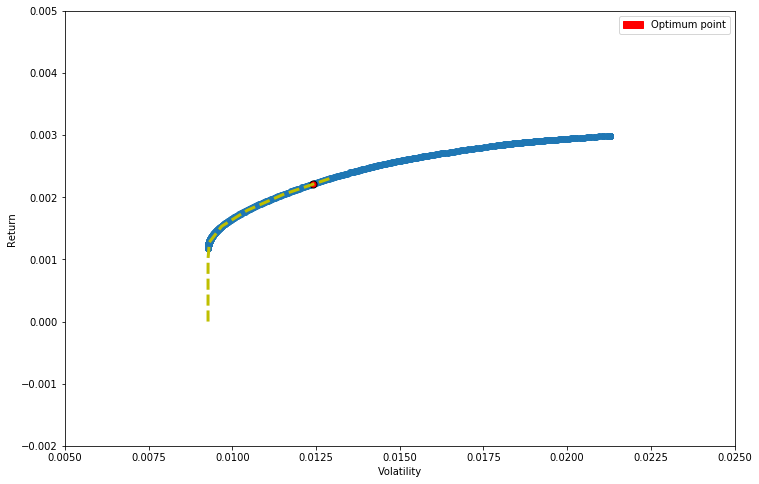

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(risks,returns)
plt.xlabel('Volatility')
plt.ylabel('Return')
red_patch = mpatches.Patch(color='red', label='Optimum point')
plt.legend(handles=[red_patch])
# Add frontier line
plt.xlim([.005, .025])
plt.ylim([-.002, .005])
plt.scatter(get_ret_vol_sr(opt_results.x)[1],get_ret_vol_sr(opt_results.x)[0],c='red',s=50,edgecolors='black')
plt.plot(frontier_volatility,frontier_y,'y--',linewidth=3)
plt.show()